# <a href="https://miptstats.github.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Домашнее задание 9

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков можно использовать без ограничений.**

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 20 баллов
* Задача 2 &mdash;  20 баллов
* Задача 3 &mdash;  25 баллов
* Задача 4 &mdash; 25 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 5 &mdash; 35 баллов


-----

In [1]:
# Bot check

# HW_ID: phds_hw9
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [86]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set(palette='Set2')

### <b><i><font color="blue">Легкая часть</font></i></b>


### Задача 1
Пусть $X = ( X_1, ... X_n)$ — выборка из неизвестного распределения $\mathsf{P} \in \{ \mathsf{P}_{\theta} | \theta \in \Theta \}$
и для проверки гипотез $\mathsf{H}_0 : \theta \in [−1, 1]$   vs.  $\mathsf{H}_1 : \theta \notin [−1, 1]$ используется критерий
$S = \{x \in \mathbb{R}^n | T(x) > 1\}$. Предположим, $T(x)$ имеет распределение $\mathcal{N}(\theta, 1)$. Какие
ответы возможны в результате проверки данных гипотез и в каких случаях? Найдите
вероятность ошибки первого рода.

*Указание:*
- Не забудьте, что в определении вероятности ошибки I рода стоит супремум по всем параметрам из основной гипотезы
- Можно показать, где достигается супремум графически. Например, с помощью `sps.norm`, где параметр `loc` отвечает за сдвиг.

***Решение:***

1. $X \in S:$ и $H_0$ верна - ошибка I рода.

2. $X \in S:$ и $H_0$ неверна - все ОК.

3. $X \notin S:$ и $H_0$ верна - все ОК.

4. $X \notin S:$ и $H_0$ неверна - ошибка II рода.

Найдём вероятность ошибки I рода:

$$P(I_S) = \sup_{\theta \in [-1, 1]}P_{\theta}(x \in S) = \sup_{\theta \in [-1, 1]}P_{\theta}(T(X) > 1) = \sup_{\theta \in [-1, 1]}(1 - \varPhi_T(1)) = 0.5$$



Text(0.5, 0, '$\\theta$')

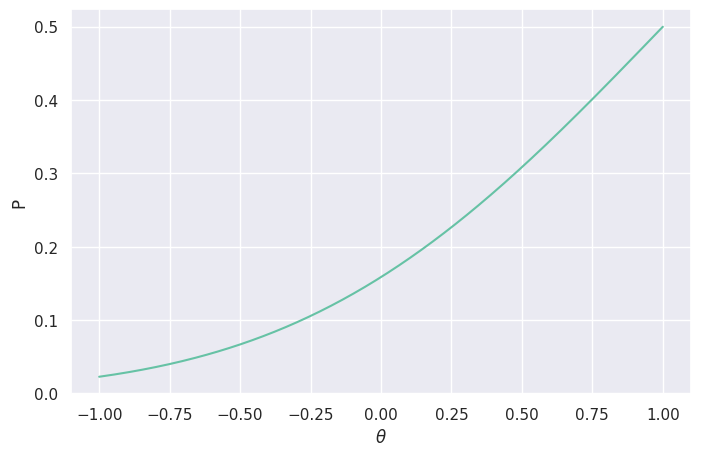

In [4]:
theta = np.linspace(-1, 1, 300)
error = sps.norm(loc = theta).sf(1)

plt.figure(figsize = (8, 5))
plt.plot(theta, error)

plt.ylabel('P')
plt.xlabel(r'$\theta$')

### Задача 2

Проведен эксперимент, получены данные из экспоненциального распределения.

In [16]:
sample = np.array([0.11731702, 0.75253036, 0.32918642, 0.22823564, 0.04240622,
        0.04239907, 0.01495969, 0.50280772, 0.22977054, 0.30781252,
        0.00519983, 0.87588937, 0.44660739, 0.05967191, 0.05016975,
        0.05065286, 0.09068843, 0.18598196, 0.14138427, 0.08605575,
        0.23659272, 0.03755863, 0.08637888, 0.1140693 , 0.15223367,
        0.384484  , 0.05568397, 0.18050729, 0.22437618, 0.01189096])

Необходимо проверить, является ли это распределение с параметром $\lambda=2$. Используя Критерий Вальда, сделайте вывод по данному предположению.

$X_1, ... X_n$ &mdash; выборка из распределения $Exp(\lambda)$.  
Проверьте гипотезу $\mathsf{H}_0\colon \lambda = 2$ vs. $\mathsf{H}_1\colon \lambda \neq 2$  
  




**1.** Из лекции вы узнали про критерий Вальда.
Для случая двусторонней альтернативы $\mathsf{H}_1\colon \theta \neq \theta_0$ критерий имел следующий вид:
$$\large{S = \left\{ \left|\sqrt{n} \frac{\hat{\theta} - \theta_0}{\hat{\sigma}} \right| > z_{1 - \frac{\alpha}{2}} \right\}}$$

где $\hat{\theta}$ &mdash; асимптотически нормальная оценка $\theta$ с асимптотической дисперсией $\sigma^2(\theta)$,
$\hat{\sigma}$ &mdash; состоятельная оценка $\sigma(\theta)$.  

Эквивалентный асимптотичсекий доверительный интервал для параметра $\theta$ уровня доверия $1-\alpha$
$$C = \left( \hat{\theta} - \frac{z_{1-\alpha/2} \hat{\sigma}}{\sqrt{n}}, \hat{\theta} + \frac{z_{1-\alpha/2} \hat{\sigma}}{\sqrt{n}}\right)$$

На первой лекции вы получали, что $\frac{1}{\overline{X}}$ &mdash; АНО для параметра $\theta$ c асимптотической дисперсией $\theta^2$


 **Выпишите состоятельную оценку дисперсии и статистику критерия Вальда**



**Ответ:**

$\hat{\sigma}^2 = \sigma^2(\hat{\theta}) = \frac{1}{\overline{X}^2}$

На лекции вы узнали про p-value &mdash; это вероятность получить при справедливости $H_0$ такое значение статистики $t = T(x)$ или еще более экстремальное, то есть в случае двустороннего критерия
$$p(x) = \mathsf{P}_0(T(X) \geq|t|) + \mathsf{P}_0(T(X) \leq -|t|)$$
Для расчета можно использовать функции из библиотеки `scipy.stats`.

**2**. Оформите функцию подсчета статистики критерия, p-value и доверительного интервала

In [30]:
alpha = 0.05
theta = 2
n = len(sample)

In [81]:
def wald_test(sample, theta, estimation_theta, estimation_sigma, alternative = 'two_sided'):
    """
    param sample: реализация выборки
    param theta: истинное значение параметра
    param estimation_theta: оценка параметра
    param estimation_sigma: оценка асимптотической дисперсии
        оценки estimation_sigma
    param alternative: вид альтернативной гипотезы,
        может принимать одно из значений 'two_sided', 'less', 'greater'

    return statistic
    return p_value
    return conf_int - доверительный интервал
    """

    alpha = 0.05
    n = sample.shape[-1]

    if alternative == 'two_sided':
        z = sps.norm.ppf(1 - alpha/2)
        statistic = np.abs(np.sqrt(n) * (estimation_theta - theta) / estimation_sigma)
        conf_int = ((estimation_theta - z * estimation_sigma / np.sqrt(n)).round(3), (estimation_theta + z * estimation_sigma / np.sqrt(n)).round(3))
        p_value = 2 * sps.norm.sf(statistic)

    elif alternative == 'less':
        z = sps.norm.ppf(alpha)
        statistic = np.sqrt(n) * (estimation_theta - theta) / estimation_sigma
        conf_int = (-np.inf, (estimation_theta - z * estimation_sigma / np.sqrt(n)).round(3))
        p_value = sps.norm.cdf(statistic)

    elif alternative == 'greater':

        z = sps.norm.ppf(1 - alpha)
        statistic = np.sqrt(n) * (estimation_theta - theta) / estimation_sigma
        conf_int = ((estimation_theta - z * estimation_sigma / np.sqrt(n)).round(3), np.inf)
        p_value = sps.norm.sf(statistic)

    return statistic.round(7), p_value.round(5), conf_int

In [82]:
estim = 1 / sample.mean()
std = 1 / sample.mean()

**3**. Проверьте гипотезу с двусторонней альтернативой.

In [83]:
two_sided = wald_test(sample, theta, estim, std, alternative = 'two_sided')
print(f'Для двусторонней альтернативы: \n Статистика: {two_sided[0]}, \n P-value: {two_sided[1]}, \n Доверительный интервал: {two_sided[2]}')

Для двусторонней альтернативы: 
 Статистика: 3.2704505, 
 P-value: 0.00107, 
 Доверительный интервал: (3.188, 6.74)


**Вывод:**

В случае двусторонней альтернативы мы можем отвергнуть нулевую гипотезу в пользу альтернативной гипотезы, так как значение p_value < 0.05, значит результат статистически значимый.

**4**. Проверьте гипотезу с правосторонней альтернативой.

In [71]:
greater = wald_test(sample, theta, estim, std, alternative = 'greater')
print(f'Для правосторонней альтернативы: \n Cтатистика: {greater[0]}, \n P-value: {greater[1]}, \n Доверительный интервал: {greater[2]}')

Для правосторонней альтернативы: 
 Cтатистика: 3.2704505, 
 P-value: 0.00054, 
 Доверительный интервал: (3.473, inf)


**Вывод:**

Правосторонняя альтернатива позволяет нам отвергнуть нулевую гипотезу, так как значение p-value < 0.05, то есть результат статистически значимый.

**5**. Проверьте гипотезу с левосторонней альтернативой.

In [94]:
less = wald_test(sample, theta, estim, std, alternative = 'less')
print(f'Для левосторонней альтернативы: \n Cтатистика: {less[0]}, \n P-value: {less[1]}, \n Доверительный интервал: {less[2]}')

Для левосторонней альтернативы: 
 Cтатистика: 36.4087145, 
 P-value: 1.0, 
 Доверительный интервал: (-inf, 1.041)


**Вывод:**

Мы не можем отвергнуть нулевую гипотезу в случае левосторонней альтернативы, так как значение p-value очень большое.

### Задача 3

На практике часто рассматривают асимптотические критерии, например, критерий Вальда. Такие критерии контролируют вероятность ошибки I рода на уровне $\alpha$ только в пределе, однако для небольших выборок она может сильно отличаться от $\alpha$, причем нередко в большую сторону. Поэтому для таких критериев возникает необходимость в вычислении значения вероятности ошибки I рода или *реального уровня значимости* при конечной выборке.

Зачастую посчитать точное значение реального уровня значимости довольно сложно, поэтому вместо него вычисляют оценку с помощью сэмплирования по методу Монте-Карло.

Пусть гипотеза $\mathsf{H}_0$ простая, то есть $\mathsf{H}_0\colon \mathsf{P} = \mathsf{P}_0$. Для ее проверки по конечной выборке $X_1, ..., X_n$ используется критерий $S$. **Опишите схему оценки реального уровня** значимости критерия $S$ методом Монте-Карло.


**Ответ:**

$$P(I_S) = P_{\theta_0}(X \in S) = \mathbb{E}_{\theta_0}I\{X \in S\}$$

1. Генерируем K выборок $X^k = (X_1^k, ... , X_n^k)$ из распределения с $\theta = \theta_0$: $\forall k \rightarrow I^k = I\{X^k \in S\}$
2. $\widehat{P(I_S)} = \overline{I\{X \in S\}}$
3. Погрешность $\varepsilon \approx \frac{1}{\sqrt{k}}$

Если гипотеза $\mathsf{H}_0$ сложная, то есть $\mathsf{H}_0\colon \mathsf{P} \in \mathscr{P}_0$, то можно повторить такую процедуру несколько раз для разных $\mathsf{P} \in \mathscr{P}_0$.

Рассмотрим альтернативную гипотезу $\mathsf{H}_1\colon \mathsf{P} \in \mathscr{P}_1$. **Опишите схему оценки мощности** критерия $S$ методом Монте-Карло.

**Ответ:**

Алгоритм тот же самый, только выборки генерируем из $\theta \in \Theta_1$, так как:

$$\beta_S(\theta) = P_{\theta} (X \in S), \quad \theta \in \Theta_1,$$ т.е. $$\hat{\beta}_S = \overline{I\{X \in S\}}$$

Пусть $X_1, ..., X_n$ &mdash; выборка из пуассоновского распределения с параметром $\theta$. Рассмотрим гипотезы $\mathsf{H}_0\colon \theta = 1\ \ vs.\ \ \mathsf{H}_1\colon \theta \not= 1$ и критерий Вальда для их проверки.

**1.** **Оцените реальный уровень значимости** критерия для $ n = 50$.

In [84]:
alpha = 0.05
sample_size = 50
sample_count = 10000

X = sps.poisson(mu = 1).rvs(size=(sample_count, sample_size))

estim = X.mean(axis = 1)
est_std = np.sqrt(estim)

w = wald_test(X, 1, estim, est_std, alternative = 'two_sided')[0]
z = sps.norm.ppf(1 - alpha/2)

np.where(w > z)[0].shape[0] / sample_count

0.0462

**Вывод:**

Реальный уровень значимости, оцененный на основе реальных данных, практически совпадает с асимптотическим уровнем значимости, что подтверждает корректность выбранного метода и аппроксимации. Это указывает на то, что теоретические результаты, основанные на асимптотических предположениях, хорошо соответствуют реальным данным, и это хорошо :)

**2.** Пусть $n=50$. **Сравните мощности критериев**, соответствующих двусторонней, левосторонней и правосторонней альтернативам при $\theta=0.2$ и при $\theta=2$.

In [88]:
names = ['two_sided', 'greater', 'less']

X_1 = sps.poisson(mu = 0.2).rvs(size = (sample_count, sample_size))
X_2  = sps.poisson(mu = 2.0).rvs(size = (sample_count, sample_size))

w_1 = [wald_test(X_1, 1, X_1.mean(axis = 1), np.sqrt(X_1.mean(axis = 1)), alternative = name)[0] for name in names]
w_2  = [wald_test(X_2, 1, X_2.mean(axis = 1), np.sqrt(X_2.mean(axis = 1)), alternative = name)[0] for name in names]

z = [sps.norm.ppf(1 - alpha/2), sps.norm.ppf(1 - alpha), sps.norm.ppf(alpha)]


answer = pd.DataFrame({
    'theta = 0.2' : (np.mean(w_1[0] > z[0]), np.mean(w_1[1] > z[1]), np.mean(w_1[2] < z[2])),
    'theta = 2' : (np.mean(w_1[0] > z[0]), np.mean(w_2[1] > z[1]), np.mean(w_2[2] < z[2]))
}, index = names)

answer

,theta = 0.2,theta = 2
two_sided,1.0,1.0000
greater,0.0,0.9999
less,1.0,0.0000


**Вывод:**

В данном случае наблюдается соответствие ожиданиям: двусторонняя альтернатива демонстрирует высокую эффективность как в случае отклонения параметра как в сторону увеличения, так и уменьшения относительно нулевой гипотезы, что подтверждает ее высокую мощность.

Левосторонняя альтернатива также демонстрирует высокую мощность теста лишь в случае отклонения параметра в меньшую сторону от нулевой гипотезы $(\theta = 0.2)$, в то время как для второго случая мощность составляет ноль.

Для правосторонней альтернативы наблюдается обратная ситуация: при $\theta = 2$ мощность высока, в то время как для второго случая мощность также равна нулю.

В целом, результаты соответствуют ожиданиям, что демонстрирует логичность и правильность выбранного метода.



### Задача 4

**Профиль физика**

Период колебания математического маятника можно расчиатать по следующей формуле:
$$T = 2\pi \sqrt{\frac{l}{g}}$$
Вы выполнили лабораторную работу по вычислению ускорения свободного падения. Длина нити маятника 50 см. В своей работе вы измеряли время 10 полных колебаний (10 периодов) с помощью обычного секундомера и получили такие значение:




In [ ]:
T_sample = [14.47, 14.46, 14.73, 14.74, 16.14, 12.6, 14.17, 12.83, 14.1, 12.81, 12.98,
            13.84, 13.96, 13.6, 14.13, 15.32, 13.98, 13.96, 12.86, 15.46, 13.2, 15.26,
            14.86, 14.49, 14.8, 12.92, 14.65, 14.47, 15.88, 15.04, 14.84, 15.12, 12.96,
            16.2, 11.99, 15.57, 13.55, 13.16, 14.76, 13.79, 12.58, 14.61, 14.1, 14.54,
            14.72, 14.87, 13.37, 14.04, 13.09, 14.7]

Получите массив величин g, используя формулу выше.

In [ ]:
<...>

Предположим, такие величины имеют нормальное распределение $\mathcal{N}(a, \sigma^2)$. Используйте критерий Вальда для проверки гипотезы $\mathsf{H}_0: a = 9.81$ vs $\mathsf{H}_1: a \neq 9.81$


In [ ]:
<...>

**Вывод:**

**Профиль биология**

Испытывается эффективность препарата, понижающего температуру. Каждому пациенту измеряют температуру до и после приема препарата. В результате разность температур для испытуемых получилась равной:


In [91]:
a_sample = np.array([1.19, 0.84, 1.3, 0.76, 0.99, 1.3, 0.97, 0.91, 0.97, 0.99, 1.18, 0.93, 0.84, 1.07, 0.95,
     1.01, 1.04, 0.84, 1.0, 1.19, 1.31, 0.97, 1.1, 0.86, 1.02, 0.95, 0.93, 0.84, 0.85, 0.78])

Предположим, такие величины имеют нормальное распределение $\mathcal{N}(a, \sigma^2)$. С помощью критерия Вальда проверьте гипотезу: $\mathsf{H}_0 \colon a=0$ vs. $\mathsf{H}_1 \colon a > 0$.

In [95]:
estim = a_sample.mean()
std = a_sample.std()
theta = 0

greater = wald_test(a_sample, theta, estim, std, alternative = 'greater')
print(f'\n Статистика: {greater[0]}, \n P-value: {greater[1]}, \n Доверительный интервал: {greater[2]}')


 Статистика: 36.4087145, 
 P-value: 0.0, 
 Доверительный интервал: (0.951, inf)


**Вывод:**

Уровень значимости критерия составляет 0, что позволяет нам отвергнуть нулевую гипотезу о том, что среднее значение разности температур равно нулю. Размер выборки велик, что обеспечивает надежность результатов и уменьшает вероятность ошибки.

### <b><i><font color="orange">Сложная часть</font></i></b>


###  Задача 5
1. Пусть $X = ( X_1, ... X_n)$ — выборка из неизвестного распределения $\mathsf{P} \in \mathcal{N}(a, \sigma^2)$. Постройте критерий для проверки гипотез $\mathsf{H}_0 : a = 0 $   vs.  $\mathsf{H}_1 : a > 0$ уровня значимости $\alpha$.

Бонусный сложный пункт: получите выражение для p-value аналогично правостороннему критерию Вальда

*Указание:*
- Используйте статистику $T(X) = \sqrt{n - 1} \frac{\overline{X}}{s}$, использовавшуюся при построении точных доверительных интервалов в нормальной модели. Какое распределение она имеет при справедливости $\mathsf{H}_0$ (т.е. при $a = 0$)?
- Подумайте, какой вид должен иметь критерий? При каких значениях $T(X)$ гипотезу $\mathsf{H}_0$ разумно отвергать?
- Этот критерий реализован в `scipy.stats.ttest_1samp`. Использовать для данной задачи его можно следующим образом: `sps.ttest_1samp(sample, popmean=0, alternative='greater')`. В результате применения функция вернет значение статистики критерия, p-value и количество степеней свободы. Вы можете проверить свой ответ с ее помощью.

**Решение:**

- Данная статистика имеет распределение Стюдента с n - 1 степенями свободы: $T(X) = T_{n-1}$.

- Критерий должен быть аналогичным критерию Вальда, но с квантилями для распределения Стюдента:
    
    - Для двусторонней оценки:
        $$S = \{|T(X)| > T_{n-1, 1 - \frac{\alpha}{2}}\}$$
        
    - Для правосторонней оценки:
        $$S = \{T(X) > T_{n-1, 1 - \alpha}\}$$
        
    - Для левосторонней оценки:
        $$S = \{T(X) < T_{n-1, \alpha}\}$$
        
- Документация метода `scipy.stats.ttest_1samp` также подтверждает мой ответ про распределение Стьюдента.

2. Пусть  $X = ( X_1, ... X_n)$ &mdash; выборка из неизвестного распределения $\mathsf{P}$ с конечным вторым моментом. Постройте асимптотический критерий для проверки гипотез $\mathsf{H}_0 \colon \mathsf{E} X = 0 $   vs.  $\mathsf{H}_1 \colon \mathsf{E} X > 0$ уровня значимости $\alpha$. Покажите, что при $n \to \infty$ этот критерий совпадает с критерием из первого пункта.

**Решение:**

Применим критерий Вальда, так как он является ассимптотическим. Тогда для поставленной задачи имеем критерий:

$$S = \{W > z_{1 - \alpha}\}, \; где \; W = \sqrt{n} \frac{\hat{\theta} - \theta_0}{\hat{\sigma}} = \sqrt{n} \frac{\hat{\theta}}{\hat{\sigma}}$$

При $n \rightarrow \infty$ распределение Стьюдента стремится к нормальному:
    
$$\frac{\sqrt{n - 1}}{S} \overline{X} \xrightarrow[n \to \infty]{} \frac{\sqrt{n}}{S}\overline{X} \sim {\cal N}(0, 1)$$

То есть при больших n критерии Вальда и Стьюдента совпадают.